In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator, StatevectorSimulator, QasmSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Step 1: Create a quantum circuit with 2 qubits (representing the quantum states of the system)
qc = QuantumCircuit(2)


In [3]:

# Step 2: Initialize the qubits in the |0> state (representing the ground state of the system)
qc.initialize([1, 0], 0)
qc.initialize([1, 0], 1)


In [4]:

# Step 3: Apply Hadamard gates to create superposition (representing quantum fluctuations)
# This step simulates the system being in a superposition of quantum states, important near the quantum critical point
qc.h(0)
qc.h(1)


In [5]:

# Step 4: Apply controlled-X (CNOT) gates to simulate interactions between qubits (spin-spin interactions)
# These interactions drive the quantum phase transition as the coupling strength is increased
qc.cx(0, 1)


In [6]:

# Step 5: Apply a Pauli-Z gate to simulate the external magnetic field or control parameter affecting the system
# This is the control parameter that can drive the system through the quantum phase transition
control_parameter = np.pi / 3  # Simulating the control parameter (e.g., magnetic field strength)
qc.rz(control_parameter, 0)



In [7]:
# Step 6: Apply additional Hadamard gates to simulate the system moving closer to the critical point
qc.h(0)
qc.h(1)



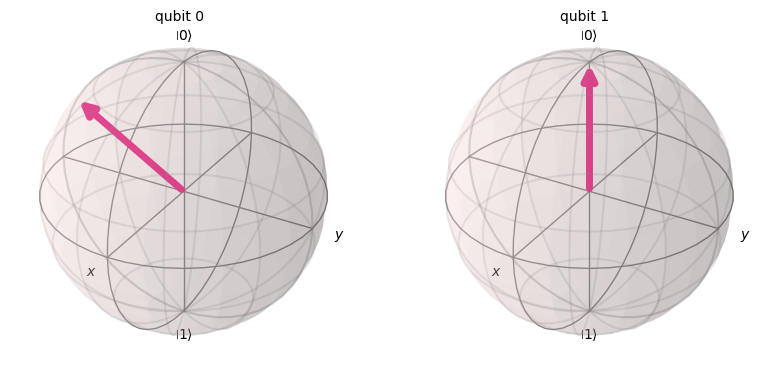

In [8]:
# Step 7: Visualize the qubit states on the Bloch sphere to observe the quantum phase transition

final_state = StatevectorSimulator().run(qc).result().get_statevector()


plot_bloch_multivector(final_state)



In [9]:
# Step 8: Measure both qubits to observe the final quantum state after the transition
qc.measure_all()



In [10]:
# Step 9: Simulate the measurement and plot the results
result = QasmSimulator().run(qc,shot =1024).result()
counts = result.get_counts(qc)



Measurement results: {'01': 234, '00': 790}


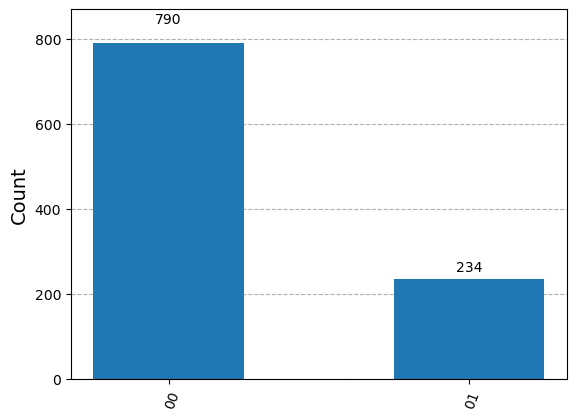

In [11]:
# Print the measurement results and plot the histogram (representing the final state after the quantum phase transition)
print(f"Measurement results: {counts}")
plot_histogram(counts)



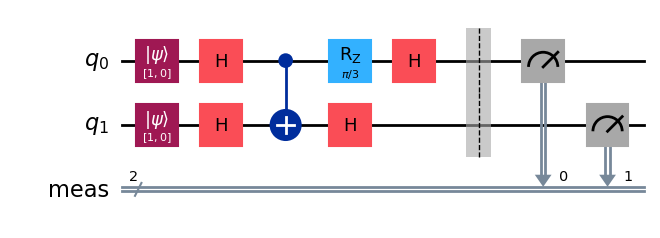

In [12]:
# Draw the quantum circuit
qc.draw(output='mpl')